reading notebook /Users/briancullinan/jupytangular2/Utilities/qr codes.ipynb
compiling /Users/briancullinan/jupytangular2/Utilities/qr codes.ipynb[1]
https://chart.googleapis.com/chart?chs=150x150&cht=qr&chl=BEGIN:VCARD%0AN:Elvis%20Presley%0ATEL;CELL:5558675309%0AEMAIL:dawid@gmail.com%0AEND:VCARD


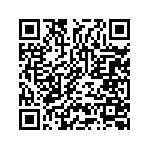

In [6]:
var util = require('util');
var importer = require('../Core');
var httpsRequest = importer.import('https request');

var first = 'Elvis';
var last = 'Presley';
var phone = '5558675309';
var email = 'dawid@gmail.com';
var qr = `https://chart.googleapis.com/chart?chs=150x150&cht=qr&chl=BEGIN:VCARD%0AN:${first}%20${last}%0ATEL;CELL:${phone}%0AEMAIL:${email}%0AEND:VCARD`

console.log(qr);
$$.async(httpsRequest(qr)
         .then(r => $$.png(r))
         .catch(e => $$.sendError(e)))



how to https request?


In [5]:
var https = require('https');

function httpRequest(params, postData) {
    return new Promise(function(resolve, reject) {
        var req = https.request(params, function(res) {
            // reject on bad status
            if (res.statusCode < 200 || res.statusCode >= 300) {
                return reject(new Error('statusCode=' + res.statusCode));
            }
            // cumulate data
            var body = [];
            res.on('data', function(chunk) {
                body.push(chunk);
            });
            // resolve on end
            res.on('end', function() {
                try {
                    body = Buffer.concat(body).toString('base64');
                } catch(e) {
                    reject(e);
                }
                resolve(body);
            });
        });
        // reject on request error
        req.on('error', function(err) {
            // This is not a "Second reject", just a different sort of failure
            reject(err);
        });
        if (postData) {
            req.write(postData);
        }
        // IMPORTANT
        req.end();
    });
}

module.exports = httpRequest;


[Function: httpRequest]